In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap


In [35]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_textura_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_textura_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))

In [36]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_z_cl= df_textura_z.drop(columns=['filename', 'label'])

In [37]:
df_textura_z_cl

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,-0.117970,-0.265037,0.573895,1.615441,0.261439,1.623821
1,-0.689035,-0.862073,1.111661,1.826963,-0.049338,1.866511
2,0.723027,0.707483,-0.528180,-0.424014,-0.919636,-0.447924
3,0.125226,0.337029,-0.517080,-0.809188,-0.678186,-0.788491
4,1.304987,1.643435,-1.718236,-0.716244,-1.826587,-0.709481
...,...,...,...,...,...,...
532,-0.277401,-0.521728,0.875899,0.606081,0.546989,0.543134
533,0.083434,-0.523298,1.088512,-0.232107,0.255967,-0.272234
534,-0.097836,-0.273793,0.451454,-0.024781,0.459498,-0.076473
535,-0.449770,-1.003507,1.655792,2.974858,0.716253,3.251952


In [38]:
""" bandwidth_values = [1.0, 3.4, 2.56]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_textura_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # 
        score = silhouette_score(df_textura_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)") """

' bandwidth_values = [1.0, 3.4, 2.56]\n\nfor bw in bandwidth_values:\n    ms = MeanShift(bandwidth=bw, bin_seeding=True)\n    ms.fit(df_textura_z_cl.values)\n    labels = ms.labels_\n    n_clusters = len(np.unique(labels))\n\n    if n_clusters > 1:  # \n        score = silhouette_score(df_textura_z_cl.values, labels)\n        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")\n    else:\n        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)") '

In [39]:
""" bandwidth = 3.40
meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(df_textura_z_cl) """

' bandwidth = 3.40\nmeanshift_z = MeanShift(bandwidth=bandwidth)\nmeanshift_z.fit(df_textura_z_cl) '

In [40]:
""" labels = meanshift_z.labels_
df_resultado_textura = pd.DataFrame({
    'filename': df_textura_z['filename'],
    'label': df_textura_z['label'],
    'cluster': labels
})

tabla_contingencia = pd.crosstab(df_resultado_textura['cluster'], df_resultado_textura['label'])
print(tabla_contingencia) """

" labels = meanshift_z.labels_\ndf_resultado_textura = pd.DataFrame({\n    'filename': df_textura_z['filename'],\n    'label': df_textura_z['label'],\n    'cluster': labels\n})\n\ntabla_contingencia = pd.crosstab(df_resultado_textura['cluster'], df_resultado_textura['label'])\nprint(tabla_contingencia) "

In [41]:
""" bandwidth = estimate_bandwidth(df_textura_z_cl, quantile=0.2, n_samples=500)

# Aplicar MeanShift con ese bandwidth
meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(df_textura_z_cl)

# Obtener etiquetas
labels = meanshift_z.labels_

# Crear resultado y tabla de contingencia
df_resultado_textura = pd.DataFrame({
    'filename': df_textura_z['filename'],
    'label': df_textura_z['label'],
    'cluster': labels
})
tabla_contingencia = pd.crosstab(df_resultado_textura['cluster'], df_resultado_textura['label'])

print(f"Bandwidth estimado: {bandwidth:.2f}")
print(tabla_contingencia) """

' bandwidth = estimate_bandwidth(df_textura_z_cl, quantile=0.2, n_samples=500)\n\n# Aplicar MeanShift con ese bandwidth\nmeanshift_z = MeanShift(bandwidth=bandwidth)\nmeanshift_z.fit(df_textura_z_cl)\n\n# Obtener etiquetas\nlabels = meanshift_z.labels_\n\n# Crear resultado y tabla de contingencia\ndf_resultado_textura = pd.DataFrame({\n    \'filename\': df_textura_z[\'filename\'],\n    \'label\': df_textura_z[\'label\'],\n    \'cluster\': labels\n})\ntabla_contingencia = pd.crosstab(df_resultado_textura[\'cluster\'], df_resultado_textura[\'label\'])\n\nprint(f"Bandwidth estimado: {bandwidth:.2f}")\nprint(tabla_contingencia) '

In [42]:
""" def detectar_outliers_iqr(df):
    outliers_dict = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers.index.tolist()
    return outliers_dict

outliers_en_columnas = detectar_outliers_iqr(df_textura_z_cl)

# Mostrar resumen
for col, indices in outliers_en_columnas.items():
    print(f"{col}: {len(indices)} outliers") """


' def detectar_outliers_iqr(df):\n    outliers_dict = {}\n    for col in df.columns:\n        Q1 = df[col].quantile(0.25)\n        Q3 = df[col].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - 1.5 * IQR\n        upper_bound = Q3 + 1.5 * IQR\n        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]\n        outliers_dict[col] = outliers.index.tolist()\n    return outliers_dict\n\noutliers_en_columnas = detectar_outliers_iqr(df_textura_z_cl)\n\n# Mostrar resumen\nfor col, indices in outliers_en_columnas.items():\n    print(f"{col}: {len(indices)} outliers") '

In [43]:
""" all_outlier_indices = set()
for indices in outliers_en_columnas.values():
    all_outlier_indices.update(indices)

df_textura_z_cl_sin_outliers = df_textura_z_cl.drop(index=all_outlier_indices)
"""


' all_outlier_indices = set()\nfor indices in outliers_en_columnas.values():\n    all_outlier_indices.update(indices)\n\ndf_textura_z_cl_sin_outliers = df_textura_z_cl.drop(index=all_outlier_indices)\n'

In [44]:
"""df_textura_z_cl_sin_outliers """

'df_textura_z_cl_sin_outliers '

In [45]:
""" bandwidth = estimate_bandwidth(df_textura_z_cl_sin_outliers, quantile=0.2, n_samples=500)

meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(df_textura_z_cl_sin_outliers)
labels = meanshift_z.labels_


df_textura_z_filtrado = df_textura_z.loc[df_textura_z_cl_sin_outliers.index]

df_resultado_textura = pd.DataFrame({
    'filename': df_textura_z_filtrado['filename'],
    'label': df_textura_z_filtrado['label'],
    'cluster': labels
})

tabla_contingencia = pd.crosstab(df_resultado_textura['cluster'], df_resultado_textura['label'])


print(f"Bandwidth estimado: {bandwidth:.2f}")
print(tabla_contingencia)
"""

' bandwidth = estimate_bandwidth(df_textura_z_cl_sin_outliers, quantile=0.2, n_samples=500)\n\nmeanshift_z = MeanShift(bandwidth=bandwidth)\nmeanshift_z.fit(df_textura_z_cl_sin_outliers)\nlabels = meanshift_z.labels_\n\n\ndf_textura_z_filtrado = df_textura_z.loc[df_textura_z_cl_sin_outliers.index]\n\ndf_resultado_textura = pd.DataFrame({\n    \'filename\': df_textura_z_filtrado[\'filename\'],\n    \'label\': df_textura_z_filtrado[\'label\'],\n    \'cluster\': labels\n})\n\ntabla_contingencia = pd.crosstab(df_resultado_textura[\'cluster\'], df_resultado_textura[\'label\'])\n\n\nprint(f"Bandwidth estimado: {bandwidth:.2f}")\nprint(tabla_contingencia)\n'

Sin reduccion de dimensionalidad no hay manera de que salga algo

In [46]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=9,n_components=2, random_state=42)
X_umap_z = umap_model_z.fit_transform(df_textura_z_cl)


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_21376\132615623.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


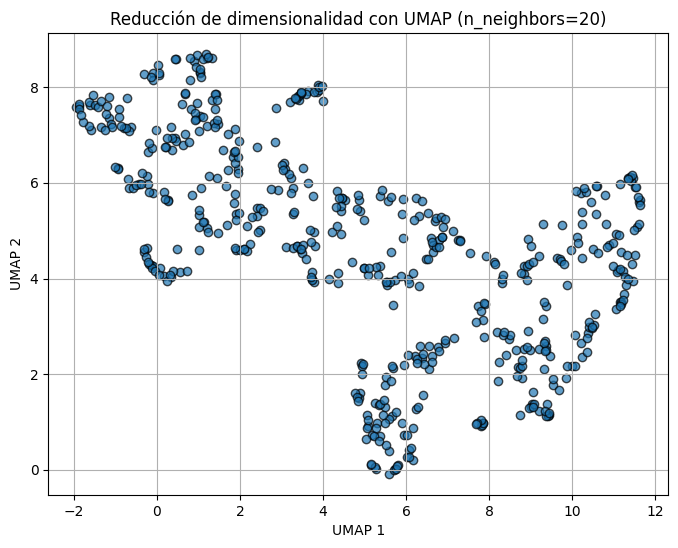

In [47]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP (n_neighbors=20)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [48]:
bandwidth_values = [1.0, 3.4, 2.56, 3.45]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(X_umap_z)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_z, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 1.00 | Clusters: 18 | Silhouette Score: 0.425
Bandwidth: 3.40 | Clusters: 2 | Silhouette Score: 0.564
Bandwidth: 2.56 | Clusters: 4 | Silhouette Score: 0.476
Bandwidth: 3.45 | Clusters: 2 | Silhouette Score: 0.564


In [49]:
bandwidth = 3.45
meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(X_umap_z)

MeanShift(bandwidth=3.45)

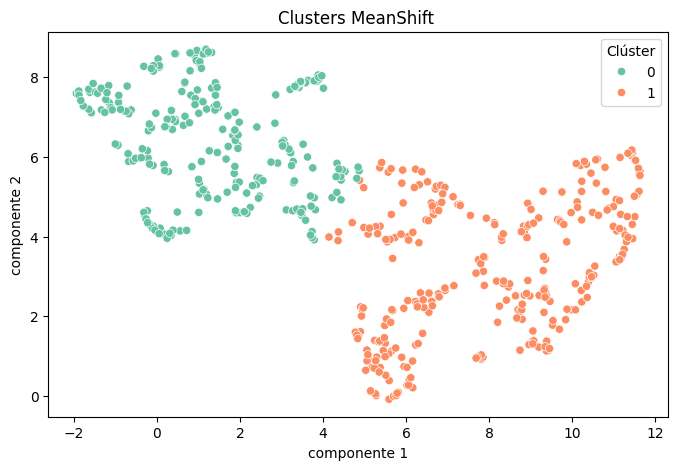

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        1
2    callo_100.png  smaller        0
3    callo_101.png  smaller        0
4    callo_102.png  smaller        0
..             ...      ...      ...
532   callo_95.png   higher        1
533   callo_96.png   higher        1
534   callo_97.png   higher        1
535   callo_98.png   higher        1
536   callo_99.png   higher        1

[537 rows x 3 columns]


In [50]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_textura_z['filename'],
    'label': df_textura_z['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado)

In [51]:
score_z = silhouette_score(X_umap_z, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.564


In [52]:
y_true = df_textura_z['label'] 
y_pred = meanshift_z.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster mean shift'])
print(contingency_table_z)

Cluster mean shift    0    1
Etiqueta Real               
higher               57  211
smaller             185   84


se hace lo mismo con normalizacion min-max:

In [53]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_mm_cl= df_textura_mm.drop(columns=['filename', 'label'])

In [54]:
"""bandwidth_values = [0.26, 0.3, 0.5, 0.51]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_textura_mm_cl.values)
    labels = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels))
    
    if n_clusters_mm > 1:  
        score = silhouette_score(df_textura_mm_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")"""

'bandwidth_values = [0.26, 0.3, 0.5, 0.51]\n\nfor bw in bandwidth_values:\n    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)\n    ms_mm.fit(df_textura_mm_cl.values)\n    labels = ms_mm.labels_\n    n_clusters_mm = len(np.unique(labels))\n\n    if n_clusters_mm > 1:  \n        score = silhouette_score(df_textura_mm_cl.values, labels)\n        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")\n    else:\n        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")'

In [55]:
"""bandwidth = 0.5
meanshift_mm = MeanShift(bandwidth=bandwidth)
meanshift_mm.fit(df_textura_mm_cl)"""

'bandwidth = 0.5\nmeanshift_mm = MeanShift(bandwidth=bandwidth)\nmeanshift_mm.fit(df_textura_mm_cl)'

In [56]:
"""labels = meanshift_mm.labels_
df_resultado_textura_mm = pd.DataFrame({
    'filename': df_textura_mm['filename'],
    'label': df_textura_mm['label'],
    'cluster': labels
})

tabla_contingencia_mm = pd.crosstab(df_resultado_textura_mm['cluster'], df_resultado_textura_mm['label'])
print(tabla_contingencia_mm)"""

"labels = meanshift_mm.labels_\ndf_resultado_textura_mm = pd.DataFrame({\n    'filename': df_textura_mm['filename'],\n    'label': df_textura_mm['label'],\n    'cluster': labels\n})\n\ntabla_contingencia_mm = pd.crosstab(df_resultado_textura_mm['cluster'], df_resultado_textura_mm['label'])\nprint(tabla_contingencia_mm)"

se concentra todo en un solo cluster, hago umap

In [57]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=9,n_components=2, random_state=42)
X_umap_mm = umap_model_mm.fit_transform(df_textura_mm_cl)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_21376\975549371.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


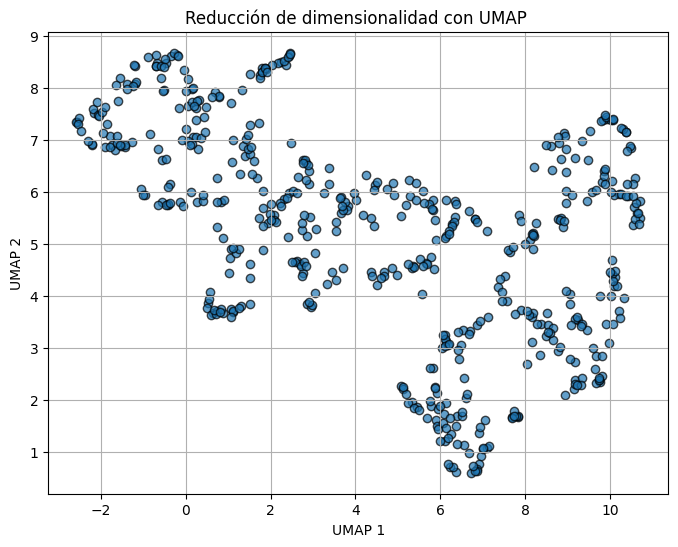

In [58]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [59]:
bandwidth_values = [1.0, 3.4, 2.56, 3.45]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(X_umap_mm)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_mm, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 1.00 | Clusters: 18 | Silhouette Score: 0.452
Bandwidth: 3.40 | Clusters: 2 | Silhouette Score: 0.568
Bandwidth: 2.56 | Clusters: 4 | Silhouette Score: 0.435
Bandwidth: 3.45 | Clusters: 2 | Silhouette Score: 0.568


In [60]:
bandwidth = 3.40
meanshift_mm = MeanShift(bandwidth=bandwidth)
meanshift_mm.fit(X_umap_mm)

MeanShift(bandwidth=3.4)

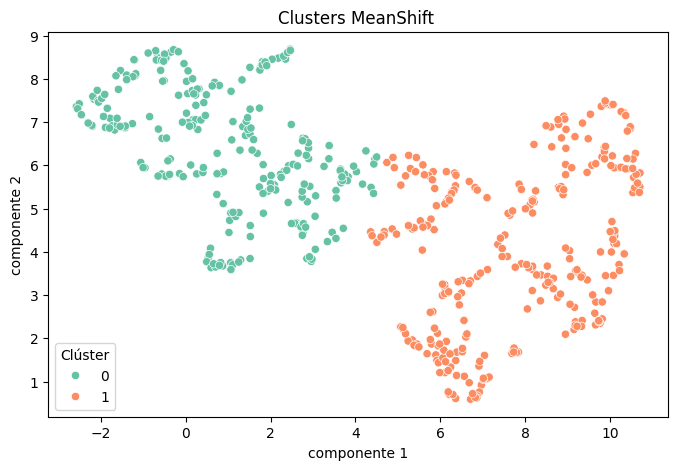

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        1
2    callo_100.png  smaller        0
3    callo_101.png  smaller        0
4    callo_102.png  smaller        0
..             ...      ...      ...
532   callo_95.png   higher        1
533   callo_96.png   higher        1
534   callo_97.png   higher        1
535   callo_98.png   higher        1
536   callo_99.png   higher        1

[537 rows x 3 columns]


In [61]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado_mm = pd.DataFrame({
    'filename': df_textura_mm['filename'],
    'label': df_textura_mm['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado_mm)

In [62]:
score_mm = silhouette_score(X_umap_mm, labels)
print(f"Silhouette Score: {score_mm:.3f}")

Silhouette Score: 0.568


In [63]:
y_true = df_textura_mm['label'] 
y_pred = meanshift_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster mean shift'])
print(contingency_table)

Cluster mean shift    0    1
Etiqueta Real               
higher               61  207
smaller             189   80
